# Import thư viện

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, learning_curve

In [6]:
data = pd.read_csv('D:\Subject\IE221_Python\DoAn\heart.csv')
data.head()

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\HP\AppData\Local\Temp\ipykernel_2340\3468274532.py:1: SyntaxWarning: invalid escape sequence '\S'
  data = pd.read_csv('D:\Subject\IE221_Python\DoAn\heart.csv')


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Kích thước dataset

In [7]:
data.shape

(1025, 14)

Thông tin dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Check Missing Values

In [34]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Khám phá dữ liệu
• Nhằm hiểu sâu hơn về bộ dữ liệu.

• Khám phá tập dữ liệu huấn luyện.

• Sau khi đánh giá hệ thống, có thể quay lại bước khám phá dữ liệu này để cải tiến hệ thống.

### 1. Trực quan hóa dữ liệu dạng đồ thị phân tán scatter

In [10]:
numeric_columns = ['age','trestbps','chol','thalach','oldpeak','slope','ca']

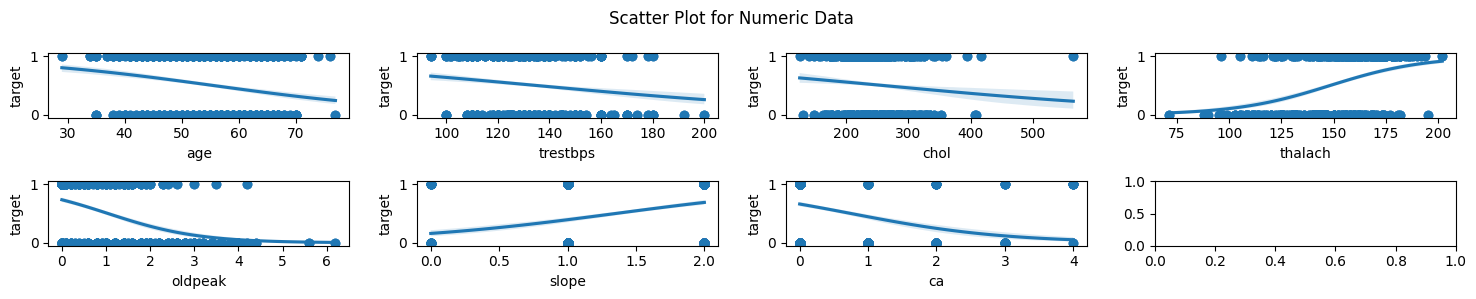

In [ ]:
numeric_columns = ['age','trestbps','chol','thalach','oldpeak','slope','ca']
fig, axes = plt.subplots(2,4, figsize=(15,3), sharey= False)
plt.suptitle("Scatter Plot for Numeric Data")
plt.subplots_adjust(hspace=0.5)
axes = axes.flatten()
for i, column in enumerate(numeric_columns):
    sns.regplot(x=column, y='target',data=data, logistic = True, ax=axes[i])

plt.tight_layout()

### 2. Trực quan hóa dữ liệu dạng đồ thị Distribution

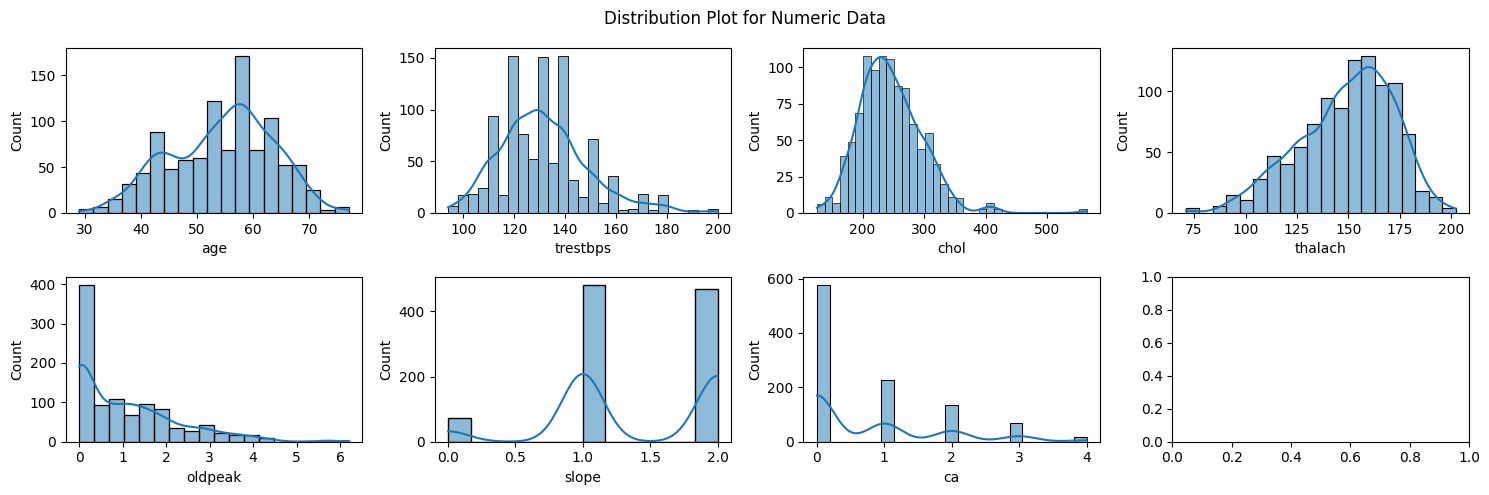

In [12]:
fig, axes = plt.subplots(2,4, figsize=(15,5), sharey= False)
plt.suptitle("Distribution Plot for Numeric Data")
#plt.subplots_adjust(hspace=0.5)

axes = axes.flatten()
skewness = data[numeric_columns].skew()

for i, column in enumerate(numeric_columns):
    sns.histplot(x=column, data=data, ax=axes[i], kde=True)
    
plt.tight_layout()

#### - Sử dụng Skewness: để đo độ lệch của phân phối của một biến số so với phân phối chuẩn (phân phối Gaussian). 

In [13]:
print("===== Skewness =====")
for column, skew in zip(numeric_columns, skewness):
    print(f'{column} = {skew}')

===== Skewness =====
age = -0.24886590174584555
trestbps = 0.739768226050074
chol = 1.0740727783354815
thalach = -0.5137771771417209
oldpeak = 1.2108993882065326
slope = -0.4791344197425813
ca = 1.2611886429097716


# Chuẩn bị dữ liệu

### 3. Loại bỏ các giá trị Outlier (Removing Outlier)

In [14]:
def remove_outliers_iqr(df, column_name, lower_bound_factor=1.5, upper_bound_factor=1.5):
    """
    Remove outliers from a numerical column in a DataFrame using the Interquartile Range (IQR) method.

    Parameters:
    - df (DataFrame): Input DataFrame containing the data.
    - column_name (str): Name of the column from which outliers are to be removed.
    - lower_bound_factor (float): Multiplier to determine the lower bound. Default is 1.5.
    - upper_bound_factor (float): Multiplier to determine the upper bound. Default is 1.5.

    Returns:
    - DataFrame: DataFrame with outliers removed.
    """
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - lower_bound_factor * IQR
    upper_bound = Q3 + upper_bound_factor * IQR

    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df_filtered

In [15]:
data_no_outlier = data.copy()

for column in numeric_columns:
    data_no_outlier = remove_outliers_iqr(data_no_outlier,column)
    
data_no_outlier.reset_index(inplace=True, drop=True)
data_no_outlier.shape

(888, 14)

#### - Sử dụng Skewness sau khi loại bỏ Outlier

In [16]:
print("===== Skewness =====")
for column, skew in zip(numeric_columns, skewness):
    print(f'{column} = {skew}')

===== Skewness =====
age = -0.24886590174584555
trestbps = 0.739768226050074
chol = 1.0740727783354815
thalach = -0.5137771771417209
oldpeak = 1.2108993882065326
slope = -0.4791344197425813
ca = 1.2611886429097716


### 4. Trực quan hóa dữ liệu dạng đồ thị Distribution sau khi loại bỏ Outlier

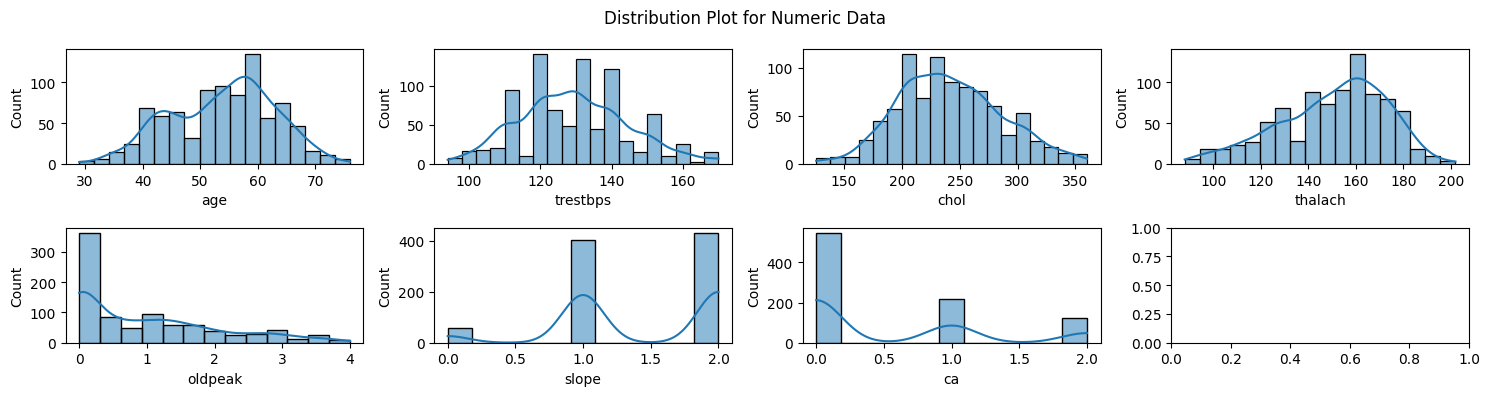

In [17]:
fig, axes = plt.subplots(2,4, figsize=(15,4), sharey= False)
plt.suptitle("Distribution Plot for Numeric Data")
#plt.subplots_adjust(hspace=0.5)

axes = axes.flatten()
skewness = data_no_outlier[numeric_columns].skew()

for i, column in enumerate(numeric_columns):
    sns.histplot(x=column, data=data_no_outlier, ax=axes[i], kde=True)
    
plt.tight_layout()

### 5. Feature Scalling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numeric_df = data_no_outlier[numeric_columns]

numeric_scaled_df = pd.DataFrame(scaler.fit_transform(numeric_df), columns = scaler.get_feature_names_out())

C:\Users\HP\AppData\Local\Temp\ipykernel_2340\3822755175.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_outlier[column],hist = False)
C:\Users\HP\AppData\Local\Temp\ipykernel_2340\3822755175.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_outlier[column

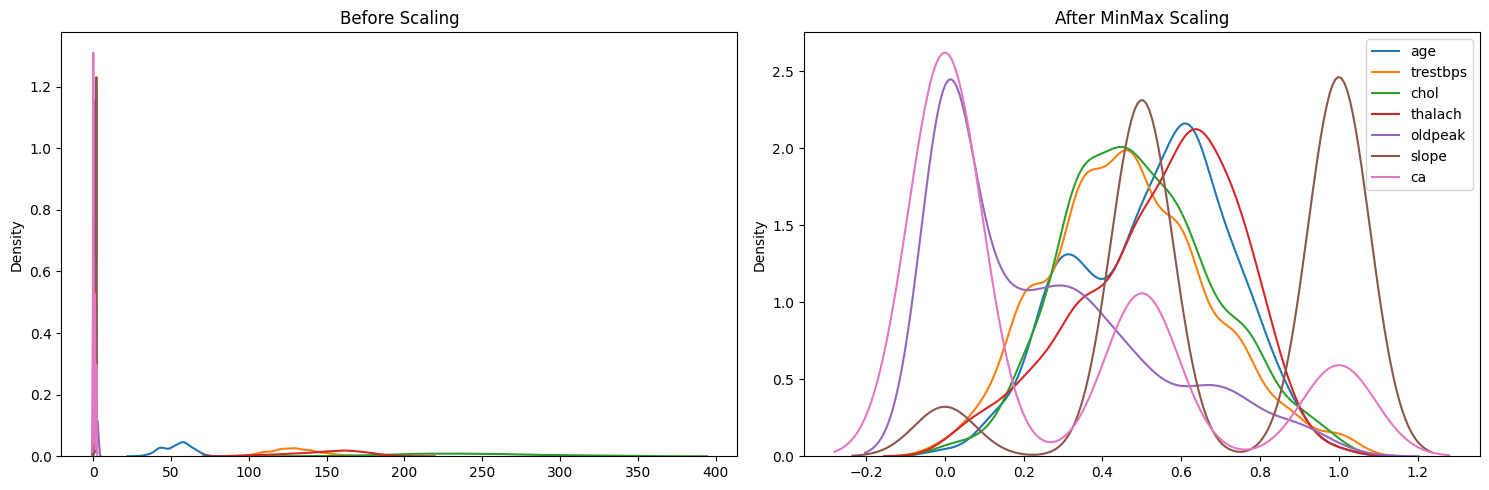

In [19]:
plt.figure(figsize=(15,5))

# Plot Before Scalling
plt.subplot(121)
for column in numeric_columns:
    sns.distplot(data_no_outlier[column],hist = False)
plt.title('Before Scaling')
plt.xlabel('')

# Plot After Scalling
plt.subplot(122)
for column in numeric_columns:
    sns.distplot(numeric_scaled_df[column],hist = False)
plt.title('After MinMax Scaling')
plt.xlabel('')

plt.legend(numeric_columns)
plt.tight_layout()
plt.show()

In [20]:
data2 = data_no_outlier
data2[numeric_columns] = numeric_scaled_df
data2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.489362,1,0,0.407895,0.367521,0,1,0.701754,0,0.250,1.0,1.0,3,0
1,0.510638,1,0,0.605263,0.329060,1,0,0.587719,1,0.775,0.0,0.0,3,0
2,0.872340,1,0,0.671053,0.205128,0,1,0.324561,1,0.650,0.0,0.0,3,0
3,0.680851,1,0,0.710526,0.329060,0,1,0.640351,0,0.000,1.0,0.5,3,0
4,0.617021,0,0,0.078947,0.521368,0,0,0.298246,0,0.250,0.5,0.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0.638298,1,1,0.605263,0.405983,0,1,0.666667,1,0.000,1.0,0.0,2,1
884,0.659574,1,0,0.407895,0.564103,0,0,0.464912,1,0.700,0.5,0.5,3,0
885,0.382979,1,0,0.210526,0.636752,0,0,0.263158,1,0.250,0.5,0.5,2,0
886,0.446809,0,0,0.210526,0.547009,0,0,0.622807,0,0.000,1.0,0.0,2,1


## Tạo feature mới từ dữ liệu ban đầu

In [21]:
def assign_age_group(age):

    age_groups = {
    (0, 40): 'Young',
    (41, 60): 'Middle-aged',
    (61, 80): 'Elderly',
    (81, float('inf')): 'Very Elderly'
    }

    for age_range, group in age_groups.items():
        if age_range[0] <= age <= age_range[1]:
            return group


In [22]:
data2['age_group'] = data['age'].apply(assign_age_group)
data2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,0.489362,1,0,0.407895,0.367521,0,1,0.701754,0,0.250,1.0,1.0,3,0,Middle-aged
1,0.510638,1,0,0.605263,0.329060,1,0,0.587719,1,0.775,0.0,0.0,3,0,Middle-aged
2,0.872340,1,0,0.671053,0.205128,0,1,0.324561,1,0.650,0.0,0.0,3,0,Elderly
3,0.680851,1,0,0.710526,0.329060,0,1,0.640351,0,0.000,1.0,0.5,3,0,Elderly
4,0.617021,0,0,0.078947,0.521368,0,0,0.298246,0,0.250,0.5,0.0,2,1,Elderly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0.638298,1,1,0.605263,0.405983,0,1,0.666667,1,0.000,1.0,0.0,2,1,Middle-aged
884,0.659574,1,0,0.407895,0.564103,0,0,0.464912,1,0.700,0.5,0.5,3,0,Elderly
885,0.382979,1,0,0.210526,0.636752,0,0,0.263158,1,0.250,0.5,0.5,2,0,Middle-aged
886,0.446809,0,0,0.210526,0.547009,0,0,0.622807,0,0.000,1.0,0.0,2,1,Elderly


In [23]:
def categorize_blood_pressure(resting_blood_pressure):
    if resting_blood_pressure < 90:
        return "Low"
    elif 90 <= resting_blood_pressure <= 120:
        return "Normal"
    else:
        return "High"

In [24]:
data2['blood_pressure_group'] = data['trestbps'].apply(categorize_blood_pressure)
data2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,blood_pressure_group
0,0.489362,1,0,0.407895,0.367521,0,1,0.701754,0,0.250,1.0,1.0,3,0,Middle-aged,High
1,0.510638,1,0,0.605263,0.329060,1,0,0.587719,1,0.775,0.0,0.0,3,0,Middle-aged,High
2,0.872340,1,0,0.671053,0.205128,0,1,0.324561,1,0.650,0.0,0.0,3,0,Elderly,High
3,0.680851,1,0,0.710526,0.329060,0,1,0.640351,0,0.000,1.0,0.5,3,0,Elderly,High
4,0.617021,0,0,0.078947,0.521368,0,0,0.298246,0,0.250,0.5,0.0,2,1,Elderly,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0.638298,1,1,0.605263,0.405983,0,1,0.666667,1,0.000,1.0,0.0,2,1,Middle-aged,High
884,0.659574,1,0,0.407895,0.564103,0,0,0.464912,1,0.700,0.5,0.5,3,0,Elderly,High
885,0.382979,1,0,0.210526,0.636752,0,0,0.263158,1,0.250,0.5,0.5,2,0,Middle-aged,High
886,0.446809,0,0,0.210526,0.547009,0,0,0.622807,0,0.000,1.0,0.0,2,1,Elderly,Normal


In [25]:
def categorize_cholesterol(cholesterol):
    if cholesterol < 200:
        return "Desirable"
    elif 200 <= cholesterol <= 239:
        return "Borderline High"
    else:
        return "High"


In [26]:
data2['cholestoral_group'] = data['chol'].apply(categorize_cholesterol)
data2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,blood_pressure_group,cholestoral_group
0,0.489362,1,0,0.407895,0.367521,0,1,0.701754,0,0.250,1.0,1.0,3,0,Middle-aged,High,Borderline High
1,0.510638,1,0,0.605263,0.329060,1,0,0.587719,1,0.775,0.0,0.0,3,0,Middle-aged,High,Borderline High
2,0.872340,1,0,0.671053,0.205128,0,1,0.324561,1,0.650,0.0,0.0,3,0,Elderly,High,Desirable
3,0.680851,1,0,0.710526,0.329060,0,1,0.640351,0,0.000,1.0,0.5,3,0,Elderly,High,Borderline High
4,0.617021,0,0,0.078947,0.521368,0,0,0.298246,0,0.250,0.5,0.0,2,1,Elderly,High,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0.638298,1,1,0.605263,0.405983,0,1,0.666667,1,0.000,1.0,0.0,2,1,Middle-aged,High,High
884,0.659574,1,0,0.407895,0.564103,0,0,0.464912,1,0.700,0.5,0.5,3,0,Elderly,High,Desirable
885,0.382979,1,0,0.210526,0.636752,0,0,0.263158,1,0.250,0.5,0.5,2,0,Middle-aged,High,High
886,0.446809,0,0,0.210526,0.547009,0,0,0.622807,0,0.000,1.0,0.0,2,1,Elderly,Normal,High


## Handling Categorical Data

lets we classify the categorical into three type:

**Nominal Features:**
* cp / chest pain type : 4 values (0,1,2,3)
* restecg / resting electrocardiographic results : 3 values (0,1,2)
* Thal : 0 = normal, 1 = fixed defect, 2 = reversible defect

**Ordinal Features:**
* age_group : 0 = Young, 1 = Middle-aged, 2 = 'Elderly', 3 = 'Very Elderly'
* blood_pressure_group : 0 = Low, 1 = Normal, 2 = High
* categorize_cholesterol : 0 = Desirable, 1 = Borderline High, 2 = High

**Binary**
* Sex (1 = Male, 0 = Female)
* Fasting blood sugar > 120 mg/dl (True, False)
* Exercise induced angina (True, False)

The binary features already set to binary (0 and 1). For Nominal will be using **OneHotEncoding**

In [27]:
from sklearn.preprocessing import OneHotEncoder

nominal_columns = ['cp','restecg','thal']
ohc = OneHotEncoder(sparse_output=False, drop='first')

dummies_df = pd.DataFrame(ohc.fit_transform(data2[nominal_columns]), columns = ohc.get_feature_names_out())
dummies_df

,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
883,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
885,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
886,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
age_group_mapping = {'Young': 0, 'Middle-aged': 1, 'Elderly': 2, 'Very Elderly' : 3}
bloodp_mapping = {'Low': 0, 'Normal': 1, 'High': 2}
chol_mapping = {'Desirable': 0, 'Borderline High': 1, 'High': 2}

# Create Ordinal Dataframe
ordinal_df = {
    'age_group' : data2['age_group'],
    'blood_pressure' : data2['blood_pressure_group'],
    'cholesterol_group' : data2['cholestoral_group']}
ordinal_df = pd.DataFrame(ordinal_df)

# Encode ordinal categories using the mappings
ordinal_df['age_group'] = ordinal_df['age_group'].map(age_group_mapping)
ordinal_df['blood_pressure'] = ordinal_df['blood_pressure'].map(bloodp_mapping)
ordinal_df['cholesterol_group'] = ordinal_df['cholesterol_group'].map(chol_mapping)
ordinal_df

,age_group,blood_pressure,cholesterol_group
0,1,2,1
1,1,2,1
2,2,2,0
3,2,2,1
4,2,2,2
...,...,...,...
883,1,2,2
884,2,2,0
885,1,2,2
886,2,1,2


Lets combining all the dataframe.

In [29]:
last_data = pd.concat([numeric_scaled_df, dummies_df, ordinal_df, data2[['sex', 'fbs','exang','target']]], axis=1)
last_data

,age,trestbps,chol,thalach,oldpeak,slope,ca,cp_1,cp_2,cp_3,...,thal_1,thal_2,thal_3,age_group,blood_pressure,cholesterol_group,sex,fbs,exang,target
0,0.489362,0.407895,0.367521,0.701754,0.250,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1,2,1,1,0,0,0
1,0.510638,0.605263,0.329060,0.587719,0.775,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1,2,1,1,1,1,0
2,0.872340,0.671053,0.205128,0.324561,0.650,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2,2,0,1,0,1,0
3,0.680851,0.710526,0.329060,0.640351,0.000,1.0,0.5,0.0,0.0,0.0,...,0.0,0.0,1.0,2,2,1,1,0,0,0
4,0.617021,0.078947,0.521368,0.298246,0.250,0.5,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2,2,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0.638298,0.605263,0.405983,0.666667,0.000,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1,2,2,1,0,1,1
884,0.659574,0.407895,0.564103,0.464912,0.700,0.5,0.5,0.0,0.0,0.0,...,0.0,0.0,1.0,2,2,0,1,0,1,0
885,0.382979,0.210526,0.636752,0.263158,0.250,0.5,0.5,0.0,0.0,0.0,...,0.0,1.0,0.0,1,2,2,1,0,1,0
886,0.446809,0.210526,0.547009,0.622807,0.000,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2,1,2,0,0,0,1


# Modelling

In [30]:
from sklearn.model_selection import train_test_split

X = last_data.drop('target', axis=1)
y = last_data['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, test_size=.3,random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(621, 21) (267, 21)
(621,) (267,)


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

models = [
    LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier()
]

acc_score = []
roc_score = []
f1 = []
name_model = []

for model in models :
  model.fit(X_train,y_train)
  y_pred =  model.predict(X_test)
  acc_score.append(accuracy_score(y_test, y_pred))
  roc_score.append(roc_auc_score(y_test, y_pred))
  f1.append(f1_score(y_test, y_pred, average='weighted'))
  name_model.append(type(model).__name__)

result = pd.DataFrame(
    {'Model Name' : name_model,
     'accuracy': acc_score,
     'roc auc' : roc_score,
     'f1-weighted' : f1}
)

result.sort_values('f1-weighted',ascending=False)

,Model Name,accuracy,roc auc,f1-weighted
2,RandomForestClassifier,0.981273,0.981462,0.981280
1,DecisionTreeClassifier,0.977528,0.979452,0.977564
0,LogisticRegression,0.850187,0.848155,0.850073
